In [10]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("WordCount-Jupyter") \
    .config("spark.ui.port", "4060") \
    .getOrCreate()

sc = spark.sparkContext

# --- job WordCount ---
txt = "PySpark makes big data processing fast and easy with Python"
rdd = sc.parallelize([txt])

counts = (rdd
          .flatMap(lambda x: x.split())
          .map(lambda word: (word, 1))
          .reduceByKey(lambda a, b: a + b))

print(sorted(counts.collect()))  # sort cho dễ đọc

# --- dọn dẹp ---
spark.stop()

[('PySpark', 1), ('Python', 1), ('and', 1), ('big', 1), ('data', 1), ('easy', 1), ('fast', 1), ('makes', 1), ('processing', 1), ('with', 1)]


In [11]:
# Import PySpark and initialize Spark session
import pyspark
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("PySparkExample").getOrCreate()

# Create a DataFrame with sample data
data = [("Alice", 25), ("Bob", 30), ("Charlie", 35)]
df = spark.createDataFrame(data, ["Name", "Age"])

# Show the DataFrame
df.show()

# Stop the Spark session
spark.stop()

25/12/03 13:21:16 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


+-------+---+
|   Name|Age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 35|
+-------+---+



In [2]:
import pandas as pd

pd.read_csv("online_retail.csv")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
2495,536592,20761,BLUE PAISLEY SKETCHBOOK,1,12/1/10 17:06,7.62,NaN,United Kingdom
2496,536592,20780,BLACK EAR MUFF HEADPHONES,1,12/1/10 17:06,11.02,NaN,United Kingdom
2497,536592,20846,ZINC HEART LATTICE T-LIGHT HOLDER,1,12/1/10 17:06,2.51,NaN,United Kingdom
2498,536592,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,1,12/1/10 17:06,5.91,NaN,United Kingdom


In [3]:
# Import SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Datacamp Pyspark Tutorial").config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","10g").getOrCreate()

25/12/03 09:36:29 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
df = spark.read.csv('online_retail.csv',header=True,escape="\"")

In [5]:
df.show(5,0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
+---------+---------+-----------------------------------+--------+------

In [9]:
df.count()

2500

In [10]:
df.select('CustomerID').distinct().count()

95

In [11]:
from pyspark.sql.functions import *
from pyspark.sql.types import *




df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).show()

+--------------+-------------+
|       Country|country_count|
+--------------+-------------+
|       Germany|            2|
|        France|            1|
|          EIRE|            1|
|        Norway|            1|
|     Australia|            1|
|United Kingdom|           88|
|   Netherlands|            1|
+--------------+-------------+



In [12]:
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).orderBy(desc('country_count')).show()

+--------------+-------------+
|       Country|country_count|
+--------------+-------------+
|United Kingdom|           88|
|       Germany|            2|
|        France|            1|
|          EIRE|            1|
|     Australia|            1|
|        Norway|            1|
|   Netherlands|            1|
+--------------+-------------+



In [13]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df.withColumn('date',to_timestamp("InvoiceDate", 'yy/MM/dd HH:mm'))
df.select(max("date")).show()

+-------------------+
|          max(date)|
+-------------------+
|2012-01-10 17:06:00|
+-------------------+



In [14]:
df.select(min("date")).show()

+-------------------+
|          min(date)|
+-------------------+
|2012-01-10 08:26:00|
+-------------------+



In [15]:
df.show(5,0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |
+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEA

In [16]:
df = df.withColumn("from_date", lit("12/1/10 08:26"))
df = df.withColumn('from_date',to_timestamp("from_date", 'yy/MM/dd HH:mm'))

df2=df.withColumn('from_date',to_timestamp(col('from_date'))).withColumn('recency',col("date").cast("long") - col('from_date').cast("long"))

In [17]:
df2 = df2.join(df2.groupBy('CustomerID').agg(max('recency').alias('recency')),on='recency',how='leftsemi')

In [18]:
df2.show(5,0)

+-------+---------+---------+-------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+
|recency|InvoiceNo|StockCode|Description                    |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |from_date          |
+-------+---------+---------+-------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+
|540    |536369   |21756    |BATH BUILDING BLOCK WORD       |3       |12/1/10 8:35|5.95     |13047     |United Kingdom|2012-01-10 08:35:00|2012-01-10 08:26:00|
|1140   |536370   |22728    |ALARM CLOCK BAKELIKE PINK      |24      |12/1/10 8:45|3.75     |12583     |France        |2012-01-10 08:45:00|2012-01-10 08:26:00|
|1140   |536370   |22727    |ALARM CLOCK BAKELIKE RED       |24      |12/1/10 8:45|3.75     |12583     |France        |2012-01-10 08:45:00|2012-01-10 08:26:00|
|1140   |536370   |22726    |ALARM CLOCK

In [19]:
df2.printSchema()

root
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)



In [20]:
df_freq = df2.groupBy('CustomerID').agg(count('InvoiceDate').alias('frequency'))

In [21]:
df_freq.show(5,0)

+----------+---------+
|CustomerID|frequency|
+----------+---------+
|16250     |14       |
|15100     |1        |
|13065     |14       |
|12838     |59       |
|15350     |5        |
+----------+---------+
only showing top 5 rows



In [23]:
df3 = df2.join(df_freq,on='CustomerID',how='inner')

In [24]:
df3.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- frequency: long (nullable = false)



In [25]:
m_val = df3.withColumn('TotalAmount',col("Quantity") * col("UnitPrice"))

In [26]:
m_val = m_val.groupBy('CustomerID').agg(sum('TotalAmount').alias('monetary_value'))

In [27]:
finaldf = m_val.join(df3,on='CustomerID',how='inner')

In [28]:
finaldf = finaldf.select(['recency','frequency','monetary_value','CustomerID']).distinct()

In [29]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assemble=VectorAssembler(inputCols=[
    'recency','frequency','monetary_value'
], outputCol='features')

assembled_data=assemble.transform(finaldf)

scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

In [30]:
data_scale_output.select('standardized').show(2,truncate=False)

+-------------------------------------------------------------+
|standardized                                                 |
+-------------------------------------------------------------+
|[0.6860448646904731,0.6848507976304103,0.45968090513788246]  |
|[0.31720353958806824,0.048917914116457885,0.7122675738936677]|
+-------------------------------------------------------------+
only showing top 2 rows



In [32]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    output=KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost

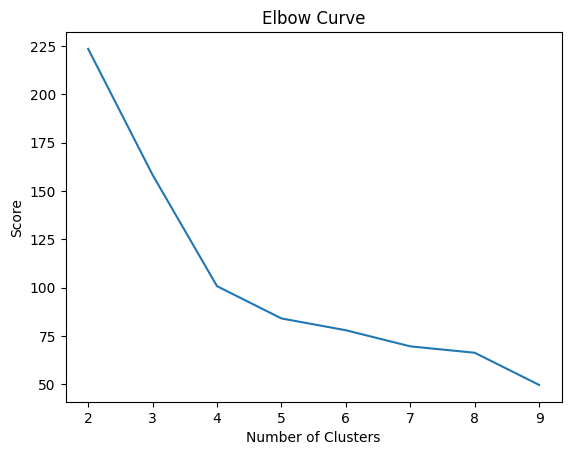

In [34]:
import pandas as pd
import pylab as pl
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2,10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [35]:
KMeans_algo=KMeans(featuresCol='standardized', k=4)
KMeans_fit=KMeans_algo.fit(data_scale_output)

In [36]:
preds=KMeans_fit.transform(data_scale_output)

preds.show(5,0)

+-------+---------+------------------+----------+---------------------------------+-------------------------------------------------------------+----------+
|recency|frequency|monetary_value    |CustomerID|features                         |standardized                                                 |prediction|
+-------+---------+------------------+----------+---------------------------------+-------------------------------------------------------------+----------+
|5580   |14       |226.14            |16250     |[5580.0,14.0,226.14]             |[0.6860448646904731,0.6848507976304103,0.45968090513788246]  |0         |
|2580   |1        |350.4             |15100     |[2580.0,1.0,350.4]               |[0.31720353958806824,0.048917914116457885,0.7122675738936677]|0         |
|30360  |14       |205.85999999999999|13065     |[30360.0,14.0,205.85999999999999]|[3.732674210036338,0.6848507976304103,0.41845719966252976]   |2         |
|12660  |59       |390.78999999999985|12838     |[12660.0,

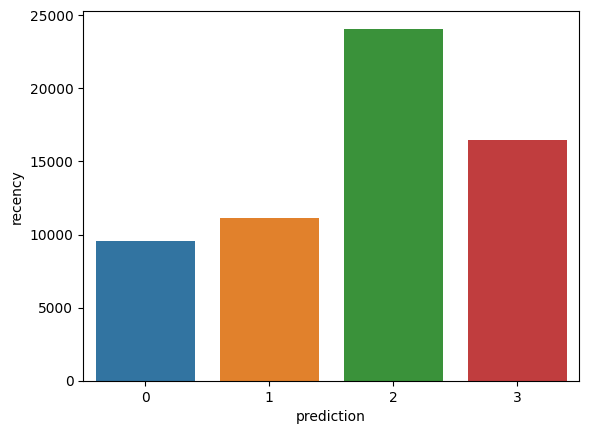

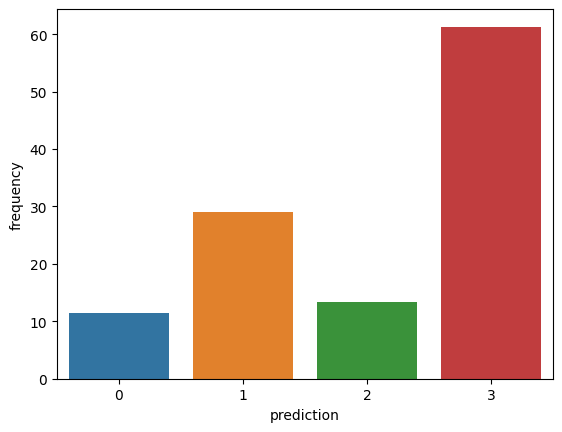

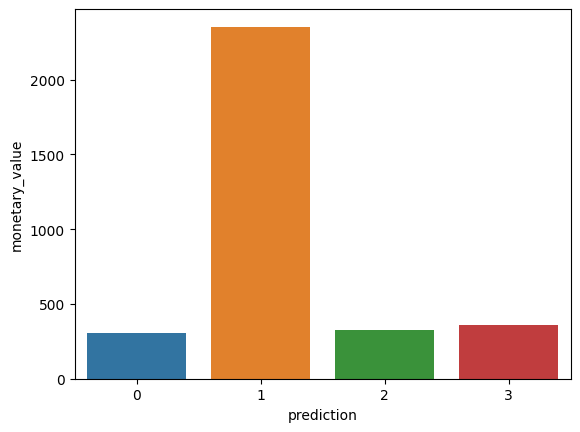

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select('recency','frequency','monetary_value','prediction')
df_viz = df_viz.toPandas()
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()

list1 = ['recency','frequency','monetary_value']

for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()